1. Galaxy Redshift
2. Continuum Fit
3. Continuum Subtraction
4. Equivalent Width
5. Fitting Gaussian
6. Monte Carlo
7. Parameter Estimation
8. Radial Velocity & Corner Plot

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from mpdaf.obj import Spectrum
from linetools.spectra.xspectrum1d import XSpectrum1D

import astropy.units as u
from astropy.io import fits
from astropy.modeling.models import Voigt1D, Gaussian1D
from astropy.convolution import convolve
from astropy.constants import c, m_e

from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d
from scipy import constants as const
from scipy.optimize import root_scalar

from mpdaf.MUSE import LSF
from IPython.display import display, Image, HTML
import corner

In [2]:
%matplotlib qt
import matplotlib.pyplot as plt

In [3]:
# (A)
hdus_A = fits.open('D:\Datacube\RXJ1131-1231\spektrum_sum_RXJ1131-1231_A_0.6.fits')
spec_A = Spectrum('D:\Datacube\RXJ1131-1231\spektrum_sum_RXJ1131-1231_A_0.6.fits')

flux_A = hdus_A['DATA'].data*u.Unit(hdus_A[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance_A = hdus_A['STAT'].data*u.Unit(hdus_A[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty_A = np.sqrt(variance_A) #uncertainty is standard deviation
wavelength_A = spec_A.wave.coord() * u.Unit(spec_A.wave.unit)# Wavelength array

sp_A = XSpectrum1D.from_tuple((wavelength_A, flux_A, uncertainty_A))
sp_A.plot()

In [4]:
# (B)
hdus_B = fits.open('D:\Datacube\RXJ1131-1231\spektrum_sum_RXJ1131-1231_B_0.6.fits')
spec_B = Spectrum('D:\Datacube\RXJ1131-1231\spektrum_sum_RXJ1131-1231_B_0.6.fits')

flux_B = hdus_B['DATA'].data*u.Unit(hdus_B[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance_B = hdus_B['STAT'].data*u.Unit(hdus_B[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty_B = np.sqrt(variance_B) #uncertainty is standard deviation
wavelength_B = spec_B.wave.coord() * u.Unit(spec_B.wave.unit)# Wavelength array

sp_B = XSpectrum1D.from_tuple((wavelength_B, flux_B, uncertainty_B))
sp_B.plot()

In [5]:
# (C)
hdus_C = fits.open('D:\Datacube\RXJ1131-1231\spektrum_sum_RXJ1131-1231_C_0.6.fits')
spec_C = Spectrum('D:\Datacube\RXJ1131-1231\spektrum_sum_RXJ1131-1231_C_0.6.fits')

flux_C = hdus_C['DATA'].data*u.Unit(hdus_C[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance_C = hdus_C['STAT'].data*u.Unit(hdus_C[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty_C = np.sqrt(variance_C) #uncertainty is standard deviation
wavelength_C = spec_C.wave.coord() * u.Unit(spec_C.wave.unit)# Wavelength array

sp_C = XSpectrum1D.from_tuple((wavelength_C, flux_C, uncertainty_C))
sp_C.plot()

In [6]:
# (D)
hdus_D = fits.open('D:\Datacube\RXJ1131-1231\spektrum_sum_RXJ1131-1231_D_0.6.fits')
spec_D = Spectrum('D:\Datacube\RXJ1131-1231\spektrum_sum_RXJ1131-1231_D_0.6.fits')

flux_D = hdus_D['DATA'].data*u.Unit(hdus_D[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance_D = hdus_D['STAT'].data*u.Unit(hdus_D[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty_D = np.sqrt(variance_D) #uncertainty is standard deviation
wavelength_D = spec_D.wave.coord() * u.Unit(spec_D.wave.unit)# Wavelength array

sp_D = XSpectrum1D.from_tuple((wavelength_D, flux_D, uncertainty_D))
sp_D.plot()

In [7]:
# (G)
hdus_G = fits.open('D:\Datacube\RXJ1131-1231\spektrum_sum_RXJ1131-1231_G_0.6.fits')
spec_G = Spectrum('D:\Datacube\RXJ1131-1231\spektrum_sum_RXJ1131-1231_G_0.6.fits')

flux_G = hdus_G['DATA'].data*u.Unit(hdus_G[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance_G = hdus_G['STAT'].data*u.Unit(hdus_G[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty_G = np.sqrt(variance_G) #uncertainty is standard deviation
wavelength_G = spec_G.wave.coord() * u.Unit(spec_G.wave.unit)# Wavelength array

sp_G = XSpectrum1D.from_tuple((wavelength_G, flux_G, uncertainty_G))
sp_G.plot()

# 1. Galaxy Redshift

In [8]:
# Ca II
lambda_3935 = 3934.777
f3935 = 6.82e-01
A3935 = 1.47e+08

lambda_3970 = 3969.591
f3970 = 3.3e-01
A3970 = 1.4e+08

# Na I
lambda_5892 = 5891.583253
f5892 = 6.41e-01
A5892 = 6.16e+07

lambda_5898 = 5897.558147
f5898 = 3.20e-01
A5898 = 6.14e+07

c_kms = c.to('km/s').value

%matplotlib inline
import matplotlib.pyplot as plt

uncertain_G = uncertainty_G[280:390]

loaded_data_G = np.load("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_G.npz")
co_G = loaded_data_G["values"] * u.Unit(spec_G.unit)

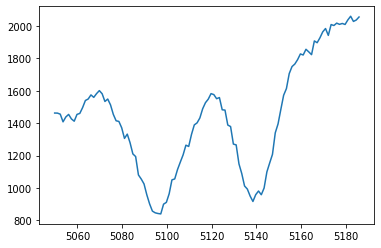

In [9]:
plt.plot(wavelength_G[280:390], flux_G[280:390])

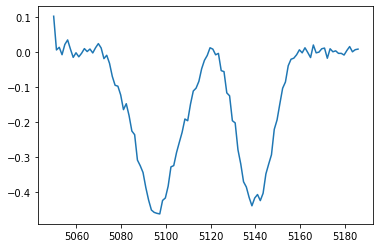

In [10]:
fluxes_gal = (flux_G[280:390].value / co_G.value) - 1
uncertainties_gal = (uncertain_G.value / co_G.value)
plt.plot(wavelength_G[280:390], fluxes_gal)

In [11]:
def convolved_model(x, amp, mu, sigma, amp2, mu2, sigma2):
    intrinsic_profile = (amp * np.exp(-0.5 * ((x - mu)/sigma)**2)) + (amp2 * np.exp(-0.5 * ((x - mu2)/sigma2)**2))
    return intrinsic_profile

# (G) Ca II
p0_gal = [-0.5, 5092, 7, -0.5, 5140, 7]

popt_gal, _ = curve_fit(convolved_model, wavelength_G[280:390], fluxes_gal, p0=p0_gal)
popt_gal

array([-4.49986084e-01,  5.09598480e+03,  9.55089943e+00, -4.45875350e-01,
        5.13990768e+03,  7.27688490e+00])

Estimated Noise Standard Deviation: 1.884


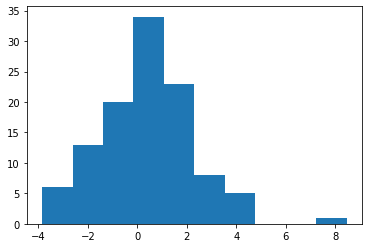

In [12]:
residuals_gal = fluxes_gal - convolved_model(wavelength_G[280:390].value, *popt_gal)

plt.hist(residuals_gal / uncertainties_gal)

std_gal = np.std(residuals_gal / uncertainties_gal)
print(f"Estimated Noise Standard Deviation: {std_gal:.3f}")

Estimated Noise Standard Deviation: 1.320


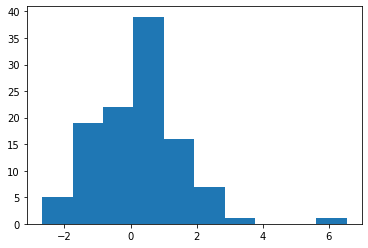

In [13]:
sigma_floor_gal = 0.01
sigma_adjusted_gal = np.sqrt(uncertainties_gal**2 + sigma_floor_gal**2)

plt.hist(residuals_gal / sigma_adjusted_gal)

std_gal = np.std(residuals_gal / sigma_adjusted_gal)
print(f"Estimated Noise Standard Deviation: {std_gal:.3f}")

In [14]:
chi_squared_gal = np.sum((residuals_gal / sigma_adjusted_gal) ** 2)
dof_gal = len(fluxes_gal) - len(popt_gal)

reduced_chi_squared_gal = chi_squared_gal / dof_gal

print(f'Chi-squared: {chi_squared_gal:.3f}')
print(f'Degree of freedom: {dof_gal:.3f}')
print(f'Reduced Chi-squared: {reduced_chi_squared_gal:.3f}')

Chi-squared: 200.567
Degree of freedom: 104.000
Reduced Chi-squared: 1.929


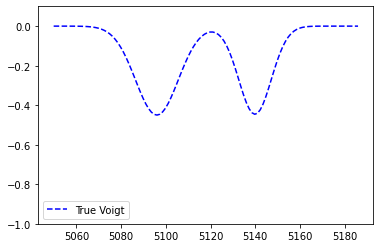

In [15]:
(recovered_amp_3935, recovered_mu_3935, recovered_std_3935, recovered_amp2_3935, recovered_mu2_3935, recovered_std2_3935) = popt_gal

true_spectrum_gal = (Gaussian1D(amplitude=recovered_amp_3935, mean=recovered_mu_3935, stddev=recovered_std_3935)
                  + Gaussian1D(amplitude=recovered_amp2_3935, mean=recovered_mu2_3935, stddev=recovered_std2_3935))

plt.plot(wavelength_G[280:390], true_spectrum_gal(wavelength_G[280:390].value), '--', label="True Voigt", color='blue')
#plt.xlim(2780, 2820)
plt.ylim(-1, 0.1)
plt.legend()

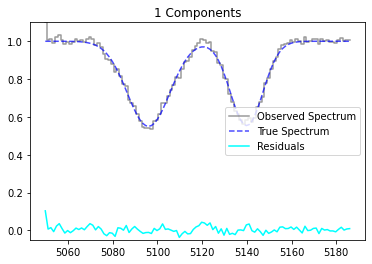

In [16]:
plt.figure()
plt.plot(wavelength_G[280:390], fluxes_gal+1, label="Observed Spectrum", color='gray', alpha= 0.8, drawstyle='steps-mid')
plt.plot(wavelength_G[280:390], true_spectrum_gal(wavelength_G[280:390].value)+1, '--', label="True Spectrum", color='blue',alpha=0.7)
plt.plot(wavelength_G[280:390], residuals_gal, label='Residuals', color='cyan')

plt.title("1 Components")
plt.ylim(-0.05,1.1)
plt.legend()

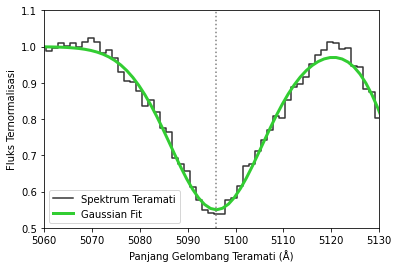

In [17]:
plt.plot(wavelength_G[280:390], fluxes_gal+1, 'k', alpha=0.8, drawstyle='steps-mid', label='Spektrum Teramati')
plt.plot(wavelength_G[280:390], true_spectrum_gal(wavelength_G[280:390].value)+1, lw=3, color='limegreen', label='Gaussian Fit')
plt.axvline(recovered_mu_3935, color="grey", linestyle=":")
plt.ylim(0.5, 1.1)
#plt.xlim(4795, 4865)
plt.xlim(5060, 5130)
plt.ylabel("Fluks Ternormalisasi")
plt.xlabel("Panjang Gelombang Teramati (Å)")
plt.legend(loc='best')

In [18]:
sim_mu_gal = []

n_sim = 1000

for x in range(0, n_sim):
    sim_fluxes_gal = fluxes_gal + np.random.normal(0, sigma_adjusted_gal)
    
    popt_gal, _ = curve_fit(convolved_model, wavelength_G[280:390], sim_fluxes_gal, p0=p0_gal)
    (recovered_amp_3935, recovered_mu_3935, recovered_std_3935, recovered_amp2_3935, recovered_mu2_3935, recovered_std2_3935) = popt_gal
    sim_mu_gal.append(recovered_mu_3935)
    
print("Simulation is done")

Simulation is done


In [19]:
sim_mu_gal = np.array(sim_mu_gal)
sim_mu_gal_mean = np.mean(sim_mu_gal)
sim_mu_gal_std = np.std(sim_mu_gal)

print(f"Fitted Mu gal: {sim_mu_gal_mean:.3f} ± {sim_mu_gal_std:.3f} Angstrom")

Fitted Mu gal: 5095.989 ± 0.114 Angstrom


In [20]:
z = (sim_mu_gal_mean - lambda_3935) / lambda_3935

err_z = sim_mu_gal_std / lambda_3935
print(f"Redshift: {z} ± {err_z} Angstrom")

Redshift: 0.29511499864132523 ± 2.908783463729208e-05 Angstrom


# 2. Continuum Fit

In [21]:
%matplotlib qt
import matplotlib.pyplot as plt

## (A) Ca II Continuum Fit

In [22]:
flux_masked_A = flux_A[280:390]
uncertainty_masked_A = uncertainty_A[280:390]
rest_wavelength_masked_A = wavelength_A[280:390]/(1+z)

sp_masked_rest_A = XSpectrum1D.from_tuple((rest_wavelength_masked_A, flux_masked_A, uncertainty_masked_A))
sp_masked_rest_A.plot()

In [26]:
sp_masked_rest_A.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [27]:
sp_masked_rest_A.co

<Quantity [12714.711 , 12807.155 , 12819.573 , 12831.375 , 12842.594 ,
           12853.26  , 12863.405 , 12873.0625, 12882.262 , 12891.036 ,
           12899.416 , 12907.434 , 12915.12  , 12922.508 , 12929.628 ,
           12936.512 , 12943.191 , 12949.624 , 12955.516 , 12960.7295,
           12965.147 , 12968.653 , 12971.128 , 12972.453 , 12972.513 ,
           12971.188 , 12968.361 , 12963.915 , 12957.284 , 12947.619 ,
           12935.453 , 12921.372 , 12905.965 , 12889.82  , 12873.526 ,
           12857.671 , 12842.841 , 12829.627 , 12818.615 , 12809.449 ,
           12800.785 , 12792.669 , 12785.176 , 12778.379 , 12772.354 ,
           12767.175 , 12762.917 , 12759.654 , 12757.461 , 12756.412 ,
           12757.165 , 12760.267 , 12765.423 , 12772.337 , 12780.714 ,
           12790.257 , 12800.669 , 12811.654 , 12822.917 , 12834.161 ,
           12845.086 , 12853.935 , 12860.523 , 12866.443 , 12873.282 ,
           12882.631 , 12896.078 , 12915.215 , 12941.629 , 12976.911 ,
      

In [28]:
np.savez("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_A.npz", values=sp_masked_rest_A.co.value, unit=str(sp_masked_rest_A.co.unit))

## (A) Na I Continuum Fit

In [23]:
flux_masked_A2 = flux_A[2310:2390]
uncertainty_masked_A2 = uncertainty_A[2310:2390]
rest_wavelength_masked_A2 = wavelength_A[2310:2390]/(1+z)

sp_masked_rest_A2 = XSpectrum1D.from_tuple((rest_wavelength_masked_A2, flux_masked_A2, uncertainty_masked_A2))
sp_masked_rest_A2.plot()

In [30]:
sp_masked_rest_A2.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [31]:
sp_masked_rest_A2.co

<Quantity [9418.796, 9112.524, 9072.78 , 9034.967, 8999.041, 8964.961,
           8932.682, 8902.161, 8873.356, 8846.224, 8820.719, 8796.801,
           8774.425, 8753.549, 8734.129, 8716.121, 8699.484, 8684.192,
           8673.999, 8670.698, 8672.764, 8678.67 , 8686.89 , 8695.897,
           8704.168, 8710.174, 8712.39 , 8709.289, 8699.347, 8680.584,
           8652.386, 8616.72 , 8575.611, 8531.091, 8485.185, 8439.921,
           8397.328, 8359.434, 8328.265, 8305.85 , 8292.842, 8282.313,
           8273.097, 8265.321, 8259.115, 8254.609, 8251.933, 8251.212,
           8252.579, 8256.16 , 8262.087, 8270.461, 8280.567, 8291.81 ,
           8303.893, 8316.518, 8329.39 , 8342.21 , 8354.682, 8366.51 ,
           8377.395, 8387.042, 8395.152, 8402.236, 8409.226, 8416.099,
           8422.83 , 8429.396, 8435.771, 8441.93 , 8447.848, 8453.499,
           8458.859, 8463.904, 8468.607, 8472.944, 8476.891, 8480.42 ,
           8483.509, 8524.44 ] 1e-20 erg / (Angstrom cm2 s)>

In [32]:
np.savez("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_A_Nai.npz", values=sp_masked_rest_A2.co.value, unit=str(sp_masked_rest_A2.co.unit))

## (B) Ca II Continuum Fit

In [24]:
flux_masked_B = flux_B[280:390]
uncertainty_masked_B = uncertainty_B[280:390]
rest_wavelength_masked_B = wavelength_B[280:390]/(1+z)

sp_masked_rest_B = XSpectrum1D.from_tuple((rest_wavelength_masked_B, flux_masked_B, uncertainty_masked_B))
sp_masked_rest_B.plot()

In [34]:
sp_masked_rest_B.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [35]:
sp_masked_rest_B.co

<Quantity [7106.522 , 7120.439 , 7120.83  , 7121.7383, 7123.1245,
           7124.95  , 7127.176 , 7129.7627, 7132.672 , 7135.8643,
           7139.301 , 7142.9424, 7146.7505, 7150.6855, 7154.709 ,
           7158.7817, 7162.8643, 7167.4688, 7174.2344, 7182.811 ,
           7192.681 , 7203.3257, 7214.2266, 7224.8647, 7234.722 ,
           7243.28  , 7250.0195, 7254.4233, 7254.9897, 7249.693 ,
           7239.631 , 7226.0303, 7210.1177, 7193.119 , 7176.261 ,
           7160.77  , 7147.8716, 7138.793 , 7134.7603, 7134.754 ,
           7135.3403, 7136.3516, 7137.684 , 7139.2344, 7140.8994,
           7142.575 , 7144.158 , 7145.546 , 7146.634 , 7147.3193,
           7147.2812, 7146.358 , 7144.77  , 7142.7393, 7140.4873,
           7138.2354, 7136.205 , 7134.6177, 7133.6953, 7133.6597,
           7134.7373, 7139.708 , 7150.3716, 7166.191 , 7186.63  ,
           7211.1523, 7239.2217, 7270.301 , 7303.854 , 7339.344 ,
           7376.235 , 7414.032 , 7454.4863, 7498.1724, 7544.282 ,
          

In [36]:
np.savez("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_B.npz", values=sp_masked_rest_B.co.value, unit=str(sp_masked_rest_B.co.unit))

## (B) Na I Continuum Fit

In [25]:
flux_masked_B2 = flux_B[2310:2390]
uncertainty_masked_B2 = uncertainty_B[2310:2390]
rest_wavelength_masked_B2 = wavelength_B[2310:2390]/(1+z)

sp_masked_rest_B2 = XSpectrum1D.from_tuple((rest_wavelength_masked_B2, flux_masked_B2, uncertainty_masked_B2))
sp_masked_rest_B2.plot()

In [38]:
sp_masked_rest_B2.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [39]:
sp_masked_rest_B2.co

<Quantity [6207.837 , 5923.7725, 5999.6343, 6045.0757, 6041.7627,
           5973.9727, 5868.485 , 5757.3394, 5660.262 , 5555.0327,
           5483.9233, 5486.7163, 5501.6787, 5517.1934, 5533.0293,
           5548.9526, 5564.733 , 5580.138 , 5595.3535, 5610.612 ,
           5625.8906, 5641.168 , 5656.421 , 5671.627 , 5686.764 ,
           5701.81  , 5716.7417, 5731.5366, 5746.1733, 5756.615 ,
           5755.357 , 5744.3257, 5725.7656, 5701.92  , 5675.0327,
           5647.3477, 5621.1084, 5598.558 , 5581.9414, 5573.5015,
           5574.223 , 5577.8174, 5582.77  , 5588.715 , 5595.2876,
           5602.123 , 5608.856 , 5615.121 , 5620.554 , 5624.7896,
           5627.462 , 5628.2607, 5628.456 , 5628.6855, 5628.9004,
           5629.0503, 5629.0854, 5628.957 , 5628.6147, 5628.009 ,
           5627.0903, 5625.8096, 5624.116 , 5622.156 , 5620.16  ,
           5618.12  , 5616.027 , 5613.8706, 5611.642 , 5609.332 ,
           5606.93  , 5604.428 , 5601.8154, 5599.0835, 5596.2227,
          

In [40]:
np.savez("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_B_Nai.npz", values=sp_masked_rest_B2.co.value, unit=str(sp_masked_rest_B2.co.unit))

## (C) Ca II Continuum Fit

In [26]:
flux_masked_C = flux_C[280:390]
uncertainty_masked_C = uncertainty_C[280:390]
rest_wavelength_masked_C = wavelength_C[280:390]/(1+z)

sp_masked_rest_C = XSpectrum1D.from_tuple((rest_wavelength_masked_C, flux_masked_C, uncertainty_masked_C))
sp_masked_rest_C.plot()

In [42]:
sp_masked_rest_C.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [43]:
sp_masked_rest_C.co

<Quantity [5176.8975, 5190.6646, 5191.76  , 5193.0767, 5194.5986,
           5196.3076, 5198.1865, 5200.2183, 5202.3857, 5204.671 ,
           5207.0576, 5209.5273, 5212.064 , 5214.6494, 5217.267 ,
           5219.899 , 5222.528 , 5225.584 , 5230.3633, 5236.494 ,
           5243.4653, 5250.764 , 5257.88  , 5264.301 , 5269.515 ,
           5273.0107, 5274.277 , 5272.802 , 5268.9946, 5264.8765,
           5260.582 , 5256.148 , 5251.612 , 5247.01  , 5242.3804,
           5237.7593, 5233.185 , 5228.694 , 5224.3237, 5220.049 ,
           5215.778 , 5211.509 , 5207.2417, 5202.9756, 5198.711 ,
           5194.4473, 5190.1846, 5185.9224, 5181.6606, 5177.399 ,
           5173.1733, 5169.027 , 5164.9624, 5160.9814, 5157.086 ,
           5153.2773, 5149.558 , 5145.9297, 5142.3945, 5138.9536,
           5135.6133, 5134.233 , 5136.297 , 5141.7393, 5150.494 ,
           5162.495 , 5177.676 , 5195.9707, 5217.3135, 5241.6377,
           5268.8774, 5298.935 , 5330.028 , 5361.1494, 5392.2993,
          

In [44]:
np.savez("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_C.npz", values=sp_masked_rest_C.co.value, unit=str(sp_masked_rest_C.co.unit))

## (C) Na I Continuum Fit

In [27]:
flux_masked_C2 = flux_C[2310:2390]
uncertainty_masked_C2 = uncertainty_C[2310:2390]
rest_wavelength_masked_C2 = wavelength_C[2310:2390]/(1+z)

sp_masked_rest_C2 = XSpectrum1D.from_tuple((rest_wavelength_masked_C2, flux_masked_C2, uncertainty_masked_C2))
sp_masked_rest_C2.plot()

In [46]:
sp_masked_rest_C2.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [47]:
sp_masked_rest_C2.co

<Quantity [5289.8477, 5072.269 , 5081.472 , 5080.8115, 5070.8604,
           5052.191 , 5025.012 , 4971.8574, 4898.5684, 4827.057 ,
           4779.235 , 4771.256 , 4772.2627, 4773.6113, 4775.1206,
           4776.6084, 4777.8926, 4778.794 , 4779.819 , 4781.313 ,
           4783.099 , 4785.0005, 4786.84  , 4788.44  , 4789.6245,
           4790.2163, 4790.038 , 4788.913 , 4786.6636, 4783.4995,
           4780.182 , 4776.7573, 4773.243 , 4769.6577, 4766.019 ,
           4762.3457, 4758.656 , 4754.967 , 4751.298 , 4747.667 ,
           4744.08  , 4740.4805, 4736.8623, 4733.2305, 4729.59  ,
           4725.9453, 4722.302 , 4718.6636, 4715.0366, 4711.4253,
           4707.8345, 4704.365 , 4703.652 , 4706.377 , 4711.86  ,
           4719.42  , 4728.3774, 4738.052 , 4747.762 , 4756.829 ,
           4764.572 , 4770.3096, 4773.363 , 4774.37  , 4774.807 ,
           4774.6807, 4773.99  , 4772.735 , 4770.915 , 4768.53  ,
           4765.579 , 4762.062 , 4757.979 , 4753.3286, 4748.1113,
          

In [48]:
np.savez("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_C_Nai.npz", values=sp_masked_rest_C2.co.value, unit=str(sp_masked_rest_C2.co.unit))

## (D) Ca II Continuum Fit

In [28]:
flux_masked_D = flux_D[280:390]
uncertainty_masked_D = uncertainty_D[280:390]
rest_wavelength_masked_D = wavelength_D[280:390]/(1+z)

sp_masked_rest_D = XSpectrum1D.from_tuple((rest_wavelength_masked_D, flux_masked_D, uncertainty_masked_D))
sp_masked_rest_D.plot()

In [50]:
sp_masked_rest_D.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [51]:
sp_masked_rest_D.co

<Quantity [1439.4816, 1477.2922, 1490.3734, 1493.5868, 1481.6864,
           1463.7499, 1449.527 , 1439.651 , 1440.357 , 1448.4218,
           1458.5098, 1468.6584, 1477.0771, 1485.6293, 1494.3048,
           1501.6443, 1506.1879, 1507.5038, 1508.3385, 1508.9701,
           1509.4087, 1509.6644, 1509.7477, 1509.6683, 1509.4368,
           1509.063 , 1508.5573, 1507.9297, 1507.1904, 1506.3497,
           1505.4176, 1504.4043, 1503.32  , 1502.1747, 1500.9788,
           1499.7423, 1498.4753, 1497.1882, 1495.891 , 1494.5939,
           1493.307 , 1492.0406, 1490.8047, 1489.6095, 1488.4652,
           1487.382 , 1486.3699, 1485.4392, 1484.6001, 1483.8625,
           1483.2369, 1482.7333, 1482.3618, 1482.1074, 1482.0748,
           1482.6302, 1483.5566, 1484.7971, 1486.3433, 1488.1864,
           1490.3181, 1492.73  , 1495.4133, 1498.3597, 1501.5607,
           1505.0077, 1508.6923, 1512.606 , 1516.7401, 1521.0863,
           1525.6361, 1530.3809, 1535.3121, 1540.4215, 1545.7003,
          

In [52]:
np.savez("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_D.npz", values=sp_masked_rest_D.co.value, unit=str(sp_masked_rest_D.co.unit))

## (D) Na I Continuum Fit

In [29]:
flux_masked_D2 = flux_D[2310:2390]
uncertainty_masked_D2 = uncertainty_D[2310:2390]
rest_wavelength_masked_D2 = wavelength_D[2310:2390]/(1+z)

sp_masked_rest_D2 = XSpectrum1D.from_tuple((rest_wavelength_masked_D2, flux_masked_D2, uncertainty_masked_D2))
sp_masked_rest_D2.plot()

In [54]:
sp_masked_rest_D2.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [55]:
sp_masked_rest_D2.co

<Quantity [2496.5308, 2386.8955, 2372.3577, 2358.4365, 2345.1633,
           2332.569 , 2320.6848, 2309.5413, 2299.1697, 2289.6013,
           2280.8667, 2272.9973, 2266.0242, 2259.978 , 2254.8901,
           2250.7913, 2247.7126, 2245.6885, 2245.3606, 2246.9219,
           2249.9775, 2254.1328, 2258.9924, 2264.1619, 2269.2458,
           2273.8494, 2277.5776, 2280.0356, 2280.8286, 2279.4956,
           2275.9773, 2270.7656, 2264.3652, 2257.28  , 2250.014 ,
           2243.0713, 2236.956 , 2232.172 , 2229.2239, 2228.6155,
           2230.8147, 2235.7273, 2242.8447, 2251.6526, 2261.6362,
           2272.2808, 2283.0718, 2293.4944, 2303.034 , 2311.176 ,
           2317.4055, 2321.2712, 2324.2075, 2326.9705, 2329.5173,
           2331.806 , 2333.7942, 2335.4397, 2336.7   , 2337.5327,
           2337.896 , 2337.747 , 2337.044 , 2335.9565, 2334.7415,
           2333.3896, 2331.8901, 2330.233 , 2328.4075, 2326.4033,
           2324.21  , 2321.817 , 2319.2139, 2316.3901, 2313.3357,
          

In [56]:
np.savez("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_D_Nai.npz", values=sp_masked_rest_D2.co.value, unit=str(sp_masked_rest_D2.co.unit))

## (G) Ca II Continuum Fit

In [30]:
flux_masked_G = flux_G[280:390]
uncertainty_masked_G = uncertainty_G[280:390]
rest_wavelength_masked_G = wavelength_G[280:390]/(1+z)

sp_masked_rest_G = XSpectrum1D.from_tuple((rest_wavelength_masked_G, flux_masked_G, uncertainty_masked_G))
sp_masked_rest_G.plot()

In [13]:
sp_masked_rest_G.fit_continuum()

knots file exists, use this? (y) N


C:\Users\hp\anaconda3\lib\site-packages\linetools\analysis\interactive_plot.py:347: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".r" (-> marker='.'). The keyword argument will take precedence.
  m0, = a1.plot([0],[0],'.r',marker='.', mec='none', lw=0, mew=0,



i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [14]:
sp_masked_rest_G.co

<Quantity [1325.8951, 1452.4247, 1435.2838, 1418.143 , 1407.0029,
           1404.5288, 1413.3856, 1433.1288, 1456.3561, 1479.4181,
           1500.4154, 1524.0925, 1546.0099, 1560.1172, 1562.3588,
           1562.3588, 1562.3588, 1562.3588, 1562.3588, 1562.3588,
           1562.3588, 1562.3588, 1562.3588, 1562.3588, 1562.3588,
           1562.3588, 1562.3588, 1562.3588, 1562.3588, 1562.3588,
           1562.3588, 1562.3588, 1562.3588, 1562.3588, 1562.3588,
           1562.3588, 1562.3588, 1562.3588, 1562.3588, 1562.3588,
           1562.3588, 1562.3588, 1562.3588, 1562.3588, 1562.3588,
           1562.3588, 1562.3588, 1562.3588, 1562.3588, 1562.3588,
           1562.3588, 1562.3588, 1562.3588, 1562.3588, 1562.3588,
           1562.3588, 1562.3588, 1562.3588, 1562.3855, 1563.1266,
           1564.8484, 1567.5024, 1571.0404, 1575.414 , 1580.5747,
           1586.4742, 1593.0642, 1600.2964, 1608.1222, 1616.4934,
           1625.3616, 1634.6785, 1644.3956, 1654.4647, 1664.8374,
          

In [15]:
np.savez("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_G.npz", values=sp_masked_rest_G.co.value, unit=str(sp_masked_rest_G.co.unit))

## (G) Na I Continuum Fit

In [31]:
flux_masked_G2 = flux_G[2310:2390]
uncertainty_masked_G2 = uncertainty_G[2310:2390]
rest_wavelength_masked_G2 = wavelength_G[2310:2390]/(1+z)

sp_masked_rest_G2 = XSpectrum1D.from_tuple((rest_wavelength_masked_G2, flux_masked_G2, uncertainty_masked_G2))
sp_masked_rest_G2.plot()

In [22]:
sp_masked_rest_G2.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [23]:
sp_masked_rest_G2.co

<Quantity [4003.0598, 3876.7905, 3922.0286, 3950.7344, 3955.181 ,
           3928.0295, 3876.1316, 3815.9158, 3762.3772, 3721.561 ,
           3680.0356, 3645.259 , 3626.1672, 3624.671 , 3625.2617,
           3626.2935, 3627.1812, 3627.3428, 3627.0203, 3626.6794,
           3626.3281, 3625.9744, 3625.6257, 3625.2903, 3624.9758,
           3624.7002, 3624.5193, 3624.4375, 3624.4507, 3624.555 ,
           3624.7468, 3625.022 , 3625.377 , 3625.8074, 3626.31  ,
           3626.8806, 3627.5154, 3628.2104, 3628.962 , 3629.766 ,
           3630.619 , 3631.5166, 3632.4553, 3633.4312, 3634.4404,
           3635.479 , 3636.5432, 3637.6292, 3638.7327, 3639.8503,
           3640.9783, 3642.3655, 3650.755 , 3667.2683, 3689.3616,
           3714.4915, 3740.1135, 3763.6843, 3782.6602, 3794.497 ,
           3795.1926, 3778.0208, 3753.897 , 3736.3774, 3735.8235,
           3739.2073, 3742.8162, 3746.3196, 3749.3867, 3751.9631,
           3754.5603, 3757.1865, 3759.8228, 3762.4497, 3765.0479,
          

In [24]:
np.savez("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_G_Nai.npz", values=sp_masked_rest_G2.co.value, unit=str(sp_masked_rest_G2.co.unit))

# 3. Continuum Subtraction

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

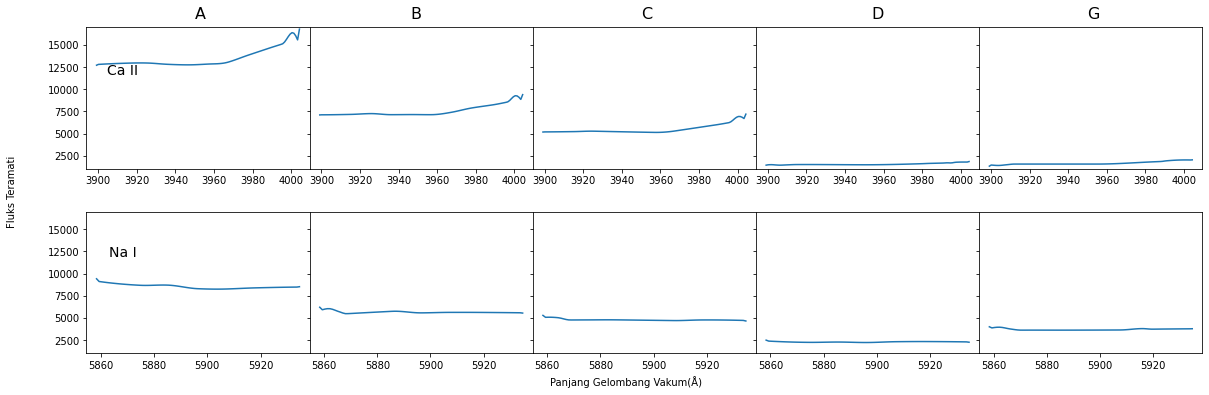

In [33]:
# (A) Ca II
wave0_A = spec_A.wave.coord() * u.Unit(spec_A.wave.unit) # Wavelength array
F0_A = spec_A.data * u.Unit(spec_A.unit) # Flux array
wave_A = wave0_A[280:390]/(1+z)
F_A = F0_A[280:390]
uncertain_A = uncertainty_A[280:390]

loaded_data_A = np.load("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_A.npz")
co_A = loaded_data_A["values"] * u.Unit(spec_A.unit)

# (A) Na I
wave_A2 = wave0_A[2310:2390]/(1+z)
F_A2 = F0_A[2310:2390]
uncertain_A2 = uncertainty_A[2310:2390]

loaded_data_A2 = np.load("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_A_Nai.npz")
co_A2 = loaded_data_A2["values"] * u.Unit(spec_A.unit)

# (B) Ca II
wave0_B = spec_B.wave.coord() * u.Unit(spec_B.wave.unit) # Wavelength array
F0_B = spec_B.data * u.Unit(spec_B.unit) # Flux array
wave_B = wave0_B[280:390]/(1+z)
F_B = F0_B[280:390]
uncertain_B = uncertainty_B[280:390]

loaded_data_B = np.load("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_B.npz")
co_B = loaded_data_B["values"] * u.Unit(spec_B.unit)

# (B) Na I
wave_B2 = wave0_B[2310:2390]/(1+z)
F_B2 = F0_B[2310:2390]
uncertain_B2 = uncertainty_B[2310:2390]

loaded_data_B2 = np.load("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_B_Nai.npz")
co_B2 = loaded_data_B2["values"] * u.Unit(spec_B.unit)

# (C) Ca II
wave0_C = spec_C.wave.coord() * u.Unit(spec_C.wave.unit) # Wavelength array
F0_C = spec_C.data * u.Unit(spec_C.unit) # Flux array
wave_C = wave0_C[280:390]/(1+z)
F_C = F0_C[280:390]
uncertain_C = uncertainty_C[280:390]

loaded_data_C = np.load("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_C.npz")
co_C = loaded_data_C["values"] * u.Unit(spec_C.unit)

# (C) Na I
wave_C2 = wave0_C[2310:2390]/(1+z)
F_C2 = F0_C[2310:2390]
uncertain_C2 = uncertainty_C[2310:2390]

loaded_data_C2 = np.load("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_C_Nai.npz")
co_C2 = loaded_data_C2["values"] * u.Unit(spec_C.unit)

# (D) Ca II
wave0_D = spec_D.wave.coord() * u.Unit(spec_D.wave.unit) # Wavelength array
F0_D = spec_D.data * u.Unit(spec_D.unit) # Flux array
wave_D = wave0_D[280:390]/(1+z)
F_D = F0_D[280:390]
uncertain_D = uncertainty_D[280:390]

loaded_data_D = np.load("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_D.npz")
co_D = loaded_data_D["values"] * u.Unit(spec_D.unit)

# (D) Na I
wave_D2 = wave0_D[2310:2390]/(1+z)
F_D2 = F0_D[2310:2390]
uncertain_D2 = uncertainty_D[2310:2390]

loaded_data_D2 = np.load("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_D_Nai.npz")
co_D2 = loaded_data_D2["values"] * u.Unit(spec_D.unit)

# (G) Ca II
wave0_G = spec_G.wave.coord() * u.Unit(spec_G.wave.unit) # Wavelength array
F0_G = spec_G.data * u.Unit(spec_G.unit) # Flux array
wave_G = wave0_G[280:390]/(1+z)
F_G = F0_G[280:390]
uncertain_G = uncertainty_G[280:390]

loaded_data_G = np.load("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_G.npz")
co_G = loaded_data_G["values"] * u.Unit(spec_G.unit)

# (G) Na I
wave_G2 = wave0_G[2310:2390]/(1+z)
F_G2 = F0_G[2310:2390]
uncertain_G2 = uncertainty_G[2310:2390]

loaded_data_G2 = np.load("D:\Datacube\RXJ1131-1231\continuum_RXJ1131-1231_G_Nai.npz")
co_G2 = loaded_data_G2["values"] * u.Unit(spec_G.unit)


# Plot
f, ax = plt.subplots(2, 5, sharey='row', figsize=(20,6), gridspec_kw={'hspace': 0.3, 'wspace':0})

ax[0,0].plot(wave_A, co_A)
ax[0,0].set_ylim(1000, 17000)
ax[1,0].plot(wave_A2, co_A2)
ax[1,0].set_ylim(1000, 17000)
ax[0,1].plot(wave_B, co_B)
ax[1,1].plot(wave_B2, co_B2)
ax[0,2].plot(wave_C, co_C)
ax[1,2].plot(wave_C2, co_C2)
ax[0,3].plot(wave_D, co_D)
ax[1,3].plot(wave_D2, co_D2)
ax[0,4].plot(wave_G, co_G)
ax[1,4].plot(wave_G2, co_G2)

f.text(0.15,0.77, 'Ca II', fontsize=14, ha='center')
f.text(0.15,0.35, 'Na I', fontsize=14, ha='center')

f.text(0.2, 0.91, 'A', va='center', fontsize=16)
f.text(0.35, 0.91, 'B', va='center', fontsize=16)
f.text(0.51, 0.91, 'C', va='center', fontsize=16)
f.text(0.67, 0.91, 'D', va='center', fontsize=16)
f.text(0.82, 0.91, 'G', va='center', fontsize=16)
f.text(0.5, 0.05, 'Panjang Gelombang Vakum(Å)', ha='center')
f.text(0.07, 0.5, 'Fluks Teramati', va='center', rotation='vertical')
plt.show()

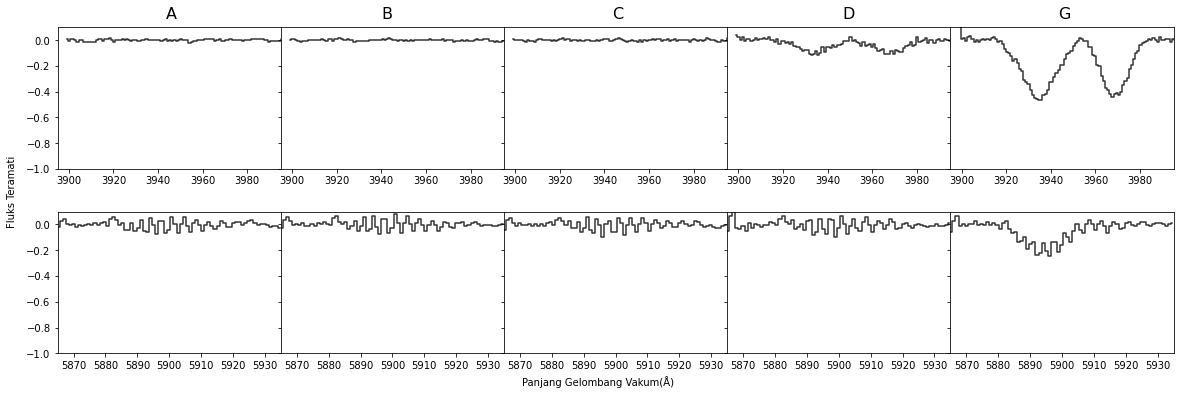

In [34]:
# (A) Ca II
wavelengths_A = wave_A.value
fluxes_A = (F_A.value / co_A.value) - 1
uncertainties_A = (uncertain_A.value / co_A.value)

# (A) Na I
wavelengths_A2 = wave_A2.value
fluxes_A2 = (F_A2.value / co_A2.value) - 1
uncertainties_A2 = (uncertain_A2.value / co_A2.value)

# (B) Ca II
wavelengths_B = wave_B.value
fluxes_B = (F_B.value / co_B.value) - 1
uncertainties_B = (uncertain_B.value / co_B.value)

# (B) Na I
wavelengths_B2 = wave_B2.value
fluxes_B2 = (F_B2.value / co_B2.value) - 1
uncertainties_B2 = (uncertain_B2.value / co_B2.value)

# (C)
wavelengths_C = wave_C.value
fluxes_C = (F_C.value / co_C.value) - 1
uncertainties_C = (uncertain_C.value / co_C.value)

# (C)
wavelengths_C2 = wave_C2.value
fluxes_C2 = (F_C2.value / co_C2.value) - 1
uncertainties_C2 = (uncertain_C2.value / co_C2.value)

# (D)
wavelengths_D = wave_D.value
fluxes_D = (F_D.value / co_D.value) - 1
uncertainties_D = (uncertain_D.value / co_D.value)

# (D)
wavelengths_D2 = wave_D2.value
fluxes_D2 = (F_D2.value / co_D2.value) - 1
uncertainties_D2 = (uncertain_D2.value / co_D2.value)

# (G)
wavelengths_G = wave_G.value
fluxes_G = (F_G.value / co_G.value) - 1
uncertainties_G = (uncertain_G.value / co_D.value)

# (G)
wavelengths_G2 = wave_G2.value
fluxes_G2 = (F_G2.value / co_G2.value) - 1
uncertainties_G2 = (uncertain_G2.value / co_G2.value)


f, ax = plt.subplots(2, 5, sharey='row', figsize=(20,6), gridspec_kw={'hspace': 0.3, 'wspace':0})

ax[0,0].plot(wavelengths_A, fluxes_A, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0,0].set_ylim(-1.0,0.1)
ax[0,0].set_xlim(3895, 3995)

ax[1,0].plot(wavelengths_A2, fluxes_A2, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1,0].set_ylim(-1.0,0.1)
ax[1,0].set_xlim(5865, 5935)

ax[0,1].plot(wavelengths_B, fluxes_B, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0,1].set_ylim(-1.0,0.1)
ax[0,1].set_xlim(3895, 3995)

ax[1,1].plot(wavelengths_B2, fluxes_B2, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1,1].set_xlim(5865, 5935)

ax[0,2].plot(wavelengths_C, fluxes_C, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0,2].set_ylim(-1.0,0.1)
ax[0,2].set_xlim(3895, 3995)

ax[1,2].plot(wavelengths_C2, fluxes_C2, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1,2].set_xlim(5865, 5935)

ax[0,3].plot(wavelengths_D, fluxes_D, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0,3].set_ylim(-1.0,0.1)
ax[0,3].set_xlim(3895, 3995)

ax[1,3].plot(wavelengths_D2, fluxes_D2, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1,3].set_xlim(5865, 5935)

ax[0,4].plot(wavelengths_G, fluxes_G, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0,4].set_ylim(-1.0,0.1)
ax[0,4].set_xlim(3895, 3995)

ax[1,4].plot(wavelengths_G2, fluxes_G2, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1,4].set_xlim(5865, 5935)

#f.text(0.15,0.77, 'Ca II', fontsize=14, ha='center')
#f.text(0.15,0.35, 'Na I', fontsize=14, ha='center')

f.text(0.2, 0.91, 'A', va='center', fontsize=16)
f.text(0.35, 0.91, 'B', va='center', fontsize=16)
f.text(0.51, 0.91, 'C', va='center', fontsize=16)
f.text(0.67, 0.91, 'D', va='center', fontsize=16)
f.text(0.82, 0.91, 'G', va='center', fontsize=16)
f.text(0.5, 0.05, 'Panjang Gelombang Vakum(Å)', ha='center')
f.text(0.09, 0.5, 'Fluks Teramati', va='center', rotation='vertical')
plt.show()

# 4. Equivalent Width

In [35]:
def compute_ew(wavelengths, flux, continuum_level, line_range):
    
    in_line_region = (wavelengths >= line_range[0]) & (wavelengths <= line_range[1])
    lam_line = wavelengths[in_line_region]
    flux_line = flux[in_line_region]

    absorption_mask = flux_line < continuum_level
    lam_absorb = lam_line[absorption_mask]
    flux_absorb = flux_line[absorption_mask]

    ew = - np.trapz(flux_absorb, lam_absorb)

    return ew

W_lambda_A = compute_ew(wavelengths_A, fluxes_A, continuum_level=0, line_range=(3917, 3953))
W_lambda_A2 = compute_ew(wavelengths_A2, fluxes_A2, continuum_level=0, line_range=(5880, 5910))
W_lambda_B = compute_ew(wavelengths_B, fluxes_B, continuum_level=0, line_range=(3917, 3953))
W_lambda_B2 = compute_ew(wavelengths_B2, fluxes_B2, continuum_level=0, line_range=(5880, 5910))
W_lambda_C = compute_ew(wavelengths_C, fluxes_C, continuum_level=0, line_range=(3917, 3953))
W_lambda_C2 = compute_ew(wavelengths_C2, fluxes_C2, continuum_level=0, line_range=(5880, 5910))
W_lambda_D = compute_ew(wavelengths_D, fluxes_D, continuum_level=0, line_range=(3917, 3953))
W_lambda_D2 = compute_ew(wavelengths_D2, fluxes_D2, continuum_level=0, line_range=(5880, 5910))
W_lambda_G = compute_ew(wavelengths_G, fluxes_G, continuum_level=0, line_range=(3917, 3953))
W_lambda_G2 = compute_ew(wavelengths_G2, fluxes_G2, continuum_level=0, line_range=(5880, 5910))

print(f"Equivalent Width (W) A Ca II λ3935: {W_lambda_A:.3f} Å")
print(f"Equivalent Width (W) A Na I: {W_lambda_A2:.3f} Å")
print(f"Equivalent Width (W) B Ca II λ3935: {W_lambda_B:.3f} Å")
print(f"Equivalent Width (W) B Na I: {W_lambda_B2:.3f} Å")
print(f"Equivalent Width (W) C Ca II λ3935: {W_lambda_C:.3f} Å")
print(f"Equivalent Width (W) C Na I: {W_lambda_C2:.3f} Å")
print(f"Equivalent Width (W) D Ca II λ3935: {W_lambda_D:.3f} Å")
print(f"Equivalent Width (W) D Na I: {W_lambda_D2:.3f} Å")
print(f"Equivalent Width (W) G Ca II λ3935: {W_lambda_G:.3f} Å")
print(f"Equivalent Width (W) G Na I: {W_lambda_G2:.3f} Å")

Equivalent Width (W) A Ca II λ3935: 0.120 Å
Equivalent Width (W) A Na I: 1.106 Å
Equivalent Width (W) B Ca II λ3935: 0.123 Å
Equivalent Width (W) B Na I: 1.133 Å
Equivalent Width (W) C Ca II λ3935: 0.201 Å
Equivalent Width (W) C Na I: 0.985 Å
Equivalent Width (W) D Ca II λ3935: 1.676 Å
Equivalent Width (W) D Na I: 1.225 Å
Equivalent Width (W) G Ca II λ3935: 8.250 Å
Equivalent Width (W) G Na I: 3.133 Å


# 5. Fitting Gaussian

In [36]:
def convolved_model_ca(x, amp, mu, sigma, amp2, sigma2):
    mu2 = mu + (lambda_3970 - lambda_3935)
    intrinsic_profile = (amp * np.exp(-0.5 * ((x - mu)/sigma)**2)) + (amp2 * np.exp(-0.5 * ((x - mu2)/sigma2)**2))
    return intrinsic_profile

In [37]:
# (D) Ca II
p0_D = [-0.2, 3935, 5, -0.2, 5]

popt_D, _ = curve_fit(convolved_model_ca, wavelengths_D, fluxes_D, p0=p0_D)
popt_D

array([-1.01175061e-01,  3.93349683e+03,  6.60615054e+00, -1.01253670e-01,
        6.30831104e+00])

Estimated Noise Standard Deviation: 1.410


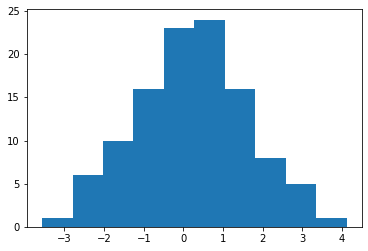

In [38]:
residuals_D = fluxes_D - convolved_model_ca(wavelengths_D, *popt_D)

plt.hist(residuals_D / uncertainties_D)

std_D = np.std(residuals_D / uncertainties_D)
print(f"Estimated Noise Standard Deviation: {std_D:.3f}")

Estimated Noise Standard Deviation: 1.000


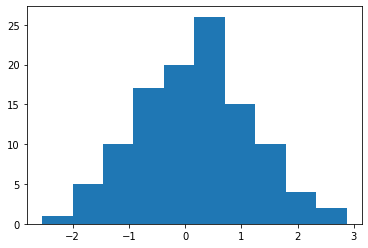

In [45]:
sigma_floor_D = 0.00977
sigma_adjusted_D = np.sqrt(uncertainties_D**2 + sigma_floor_D**2)

plt.hist(residuals_D / sigma_adjusted_D)

std_D = np.std(residuals_D / sigma_adjusted_D)
print(f"Estimated Noise Standard Deviation: {std_D:.3f}")

In [46]:
chi_squared_D = np.sum((residuals_D / sigma_adjusted_D) ** 2)
dof_D = len(fluxes_D) - len(popt_D)

reduced_chi_squared_D = chi_squared_D / dof_D

print(f'Chi-squared: {chi_squared_D:.3f}')
print(f'Degree of freedom: {dof_D:.3f}')
print(f'Reduced Chi-squared: {reduced_chi_squared_D:.3f}')

Chi-squared: 112.259
Degree of freedom: 105.000
Reduced Chi-squared: 1.069


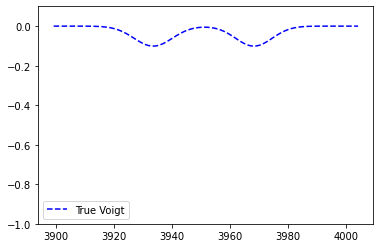

In [47]:
(recovered_amp_3935, recovered_mu_3935, recovered_std_3935, recovered_amp2_3935, recovered_std2_3935) = popt_D
recovered_mu2_3935 = recovered_mu_3935 + (lambda_3970 - lambda_3935)

true_spectrum_D = (Gaussian1D(amplitude=recovered_amp_3935, mean=recovered_mu_3935, stddev=recovered_std_3935)
                  + Gaussian1D(amplitude=recovered_amp2_3935, mean=recovered_mu2_3935, stddev=recovered_std2_3935))

plt.plot(wavelengths_D, true_spectrum_D(wavelengths_D), '--', label="True Voigt", color='blue')
#plt.xlim(2780, 2820)
plt.ylim(-1, 0.1)
plt.legend()

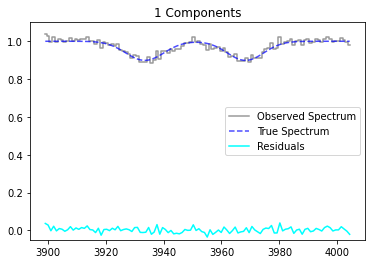

In [48]:
plt.figure()
plt.plot(wavelengths_D, fluxes_D+1, label="Observed Spectrum", color='gray', alpha= 0.8, drawstyle='steps-mid')
plt.plot(wavelengths_D, true_spectrum_D(wavelengths_D)+1, '--', label="True Spectrum", color='blue',alpha=0.7)
plt.plot(wavelengths_D, residuals_D, label='Residuals', color='cyan')

plt.title("1 Components")
plt.ylim(-0.05,1.1)
plt.legend()

(-2000.0, 2000.0)

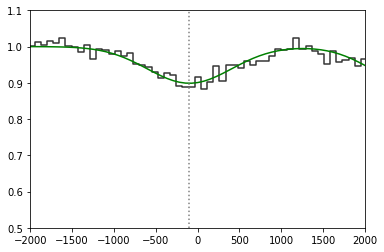

In [49]:
v_3935_D = c_kms * (wavelengths_D - lambda_3935) / lambda_3935

vline_3935_D = c_kms * (recovered_mu_3935 - lambda_3935) / lambda_3935

plt.plot(v_3935_D, fluxes_D+1, 'k', alpha=0.8, drawstyle='steps-mid')
plt.plot(v_3935_D, true_spectrum_D(wavelengths_D)+1, color='green')
plt.axvline(vline_3935_D, color="grey", linestyle=":")
plt.ylim(0.5, 1.1)
plt.xlim(-2000,2000)

In [50]:
# (G) Ca II
p0_G = [-0.2, 3935, 2, -0.2, 2]

popt_G, _ = curve_fit(convolved_model_ca, wavelengths_G, fluxes_G, p0=p0_G)
popt_G

array([-4.48528615e-01,  3.93426736e+03,  7.40672239e+00, -4.44268387e-01,
        5.64779306e+00])

Estimated Noise Standard Deviation: 2.118


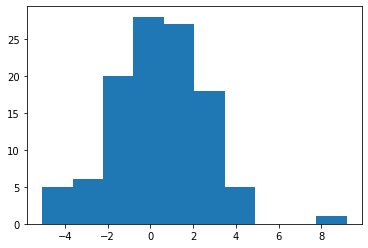

In [51]:
residuals_G = fluxes_G - convolved_model_ca(wavelengths_G, *popt_G)

plt.hist(residuals_G / uncertainties_G)

std_G = np.std(residuals_G / uncertainties_G)
print(f"Estimated Noise Standard Deviation: {std_G:.3f}")

Estimated Noise Standard Deviation: 1.501


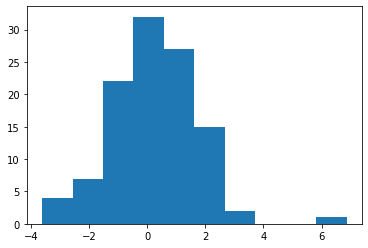

In [52]:
sigma_floor_G = 0.01
sigma_adjusted_G = np.sqrt(uncertainties_G**2 + sigma_floor_G**2)

plt.hist(residuals_G / sigma_adjusted_G)

std_G = np.std(residuals_G / sigma_adjusted_G)
print(f"Estimated Noise Standard Deviation: {std_G:.3f}")

In [53]:
chi_squared_G = np.sum((residuals_G / sigma_adjusted_G) ** 2)
dof_G = len(fluxes_G) - len(popt_G)

reduced_chi_squared_G = chi_squared_G / dof_G

print(f'Chi-squared: {chi_squared_G:.3f}')
print(f'Degree of freedom: {dof_G:.3f}')
print(f'Reduced Chi-squared: {reduced_chi_squared_G:.3f}')

Chi-squared: 257.406
Degree of freedom: 105.000
Reduced Chi-squared: 2.451


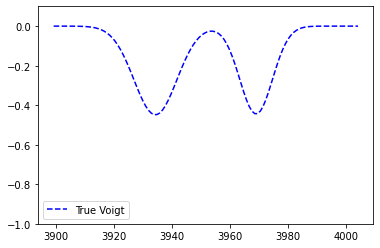

In [54]:
(recovered_amp_3935, recovered_mu_3935, recovered_std_3935, recovered_amp2_3935, recovered_std2_3935) = popt_G
recovered_mu2_3935 = recovered_mu_3935 + (lambda_3970 - lambda_3935)

true_spectrum_G = (Gaussian1D(amplitude=recovered_amp_3935, mean=recovered_mu_3935, stddev=recovered_std_3935)
                  + Gaussian1D(amplitude=recovered_amp2_3935, mean=recovered_mu2_3935, stddev=recovered_std2_3935))

plt.plot(wavelengths_G, true_spectrum_G(wavelengths_G), '--', label="True Voigt", color='blue')
#plt.xlim(2780, 2820)
plt.ylim(-1, 0.1)
plt.legend()

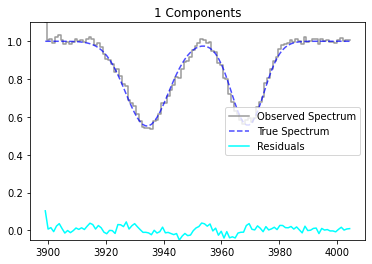

In [55]:
plt.figure()
plt.plot(wavelengths_G, fluxes_G+1, label="Observed Spectrum", color='gray', alpha= 0.8, drawstyle='steps-mid')
plt.plot(wavelengths_G, true_spectrum_G(wavelengths_G)+1, '--', label="True Spectrum", color='blue',alpha=0.7)
plt.plot(wavelengths_G, residuals_G, label='Residuals', color='cyan')

plt.title("1 Components")
plt.ylim(-0.05,1.1)
plt.legend()

(-2000.0, 2000.0)

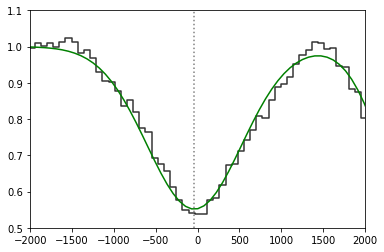

In [56]:
v_3935_G = c_kms * (wavelengths_G - lambda_3935) / lambda_3935

vline_3935_G = c_kms * (recovered_mu_3935 - lambda_3935) / lambda_3935

plt.plot(v_3935_G, fluxes_G+1, 'k', alpha=0.8, drawstyle='steps-mid')
plt.plot(v_3935_G, true_spectrum_G(wavelengths_G)+1, color='green')
plt.axvline(vline_3935_G, color="grey", linestyle=":")
plt.ylim(0.5, 1.1)
plt.xlim(-2000,2000)

# 6. Monte Carlo

In [71]:
sim_W_A = []
sim_W_A2 = []
sim_W_B = []
sim_W_B2 = []
sim_W_C = []
sim_W_C2 = []
sim_W_D = []
sim_W_D2 = []
sim_W_G = []
sim_W_G2 = []

sim_amp_D = []
sim_mu_D = []
sim_std_D = []
sim_amp_G = []
sim_mu_G = []
sim_std_G = []

sim_chi_D = []
sim_reduced_chi_D = []
sim_chi_G = []
sim_reduced_chi_G = []

n_sim = 1000

for x in range(0, n_sim):
    sim_fluxes_A = fluxes_A + np.random.normal(0, uncertainties_A)
    sim_fluxes_A2 = fluxes_A2 + np.random.normal(0, uncertainties_A2)
    sim_fluxes_B = fluxes_B + np.random.normal(0, uncertainties_B)
    sim_fluxes_B2 = fluxes_B2 + np.random.normal(0, uncertainties_B2)
    sim_fluxes_C = fluxes_C + np.random.normal(0, uncertainties_C)
    sim_fluxes_C2 = fluxes_C2 + np.random.normal(0, uncertainties_C2)
    sim_fluxes_D = fluxes_D + np.random.normal(0, uncertainties_D)
    sim_fluxes_D2 = fluxes_D2 + np.random.normal(0, uncertainties_D2)
    sim_fluxes_G = fluxes_G + np.random.normal(0, uncertainties_G)
    sim_fluxes_G2 = fluxes_G2 + np.random.normal(0, uncertainties_G2)

    W_lambda_A = compute_ew(wavelengths_A, sim_fluxes_A, continuum_level=0, line_range=(3913, 3955))
    W_lambda_A2 = compute_ew(wavelengths_A2, sim_fluxes_A2, continuum_level=0, line_range=(5880, 5910))
    W_lambda_B = compute_ew(wavelengths_B, sim_fluxes_B, continuum_level=0, line_range=(3913, 3955))
    W_lambda_B2 = compute_ew(wavelengths_B2, sim_fluxes_B2, continuum_level=0, line_range=(5880, 5910))
    W_lambda_C = compute_ew(wavelengths_C, sim_fluxes_C, continuum_level=0, line_range=(3913, 3955))
    W_lambda_C2 = compute_ew(wavelengths_C2, sim_fluxes_C2, continuum_level=0, line_range=(5880, 5910))
    W_lambda_D = compute_ew(wavelengths_D, sim_fluxes_D, continuum_level=0, line_range=(3913, 3955))
    W_lambda_D2 = compute_ew(wavelengths_D2, sim_fluxes_D2, continuum_level=0, line_range=(5880, 5910))
    W_lambda_G = compute_ew(wavelengths_G, sim_fluxes_G, continuum_level=0, line_range=(3913, 3955))
    W_lambda_G2 = compute_ew(wavelengths_G2, sim_fluxes_G2, continuum_level=0, line_range=(5880, 5910))
    
    sim_W_D.append(W_lambda_D)
    sim_W_D2.append(W_lambda_D2)
    sim_W_G.append(W_lambda_G)
    sim_W_G2.append(W_lambda_G2)
    
    popt_D, _ = curve_fit(convolved_model_ca, wavelengths_D, sim_fluxes_D, p0=p0_D, 
                          sigma=sigma_adjusted_D, absolute_sigma=True, maxfev=5000)
    recovered_amp_D, recovered_mu_3935_D, recovered_stddev_D, recovered_amp2_D, recovered_stddev2_D = popt_D
    popt_G, _ = curve_fit(convolved_model_ca, wavelengths_G, sim_fluxes_G, p0=p0_G, 
                          sigma=sigma_adjusted_G, absolute_sigma=True, maxfev=5000)
    recovered_amp_G, recovered_mu_3935_G, recovered_stddev_G, recovered_amp2_G, recovered_stddev2_G = popt_G
    
    sim_amp_D.append(recovered_amp_D)
    sim_mu_D.append(recovered_mu_3935_D)
    sim_std_D.append(recovered_stddev_D)
    sim_amp_G.append(recovered_amp_G)
    sim_mu_G.append(recovered_mu_3935_G)
    sim_std_G.append(recovered_stddev_G)
    
    residuals_D = sim_fluxes_D - convolved_model_ca(wavelengths_D, *popt_D)
    chi_squared_D = np.sum((residuals_D / sigma_adjusted_D) ** 2)
    dof_D = len(sim_fluxes_D) - len(popt_D)
    reduced_chi_squared_D = chi_squared_D / dof_D
    
    residuals_G = sim_fluxes_G - convolved_model_ca(wavelengths_G, *popt_G)
    chi_squared_G = np.sum((residuals_G / sigma_adjusted_G) ** 2)
    dof_G = len(sim_fluxes_G) - len(popt_G)
    reduced_chi_squared_G = chi_squared_G / dof_G

print("Simulation is done")

Simulation is done


In [72]:
sim_W_A = np.array(sim_W_A)
W_A_mean = np.mean(sim_W_A)
W_A_std = np.std(sim_W_A)

sim_W_A2 = np.array(sim_W_A2)
W_A2_mean = np.mean(sim_W_A2)
W_A2_std = np.std(sim_W_A2)

sim_W_B_B = np.array(sim_W_B)
W_B_mean = np.mean(sim_W_B)
W_B_std = np.std(sim_W_B)

sim_W_B2 = np.array(sim_W_B2)
W_B2_mean = np.mean(sim_W_B2)
W_B2_std = np.std(sim_W_B2)

sim_W_C = np.array(sim_W_C)
W_C_mean = np.mean(sim_W_C)
W_C_std = np.std(sim_W_C)

sim_W_C2 = np.array(sim_W_C2)
W_C2_mean = np.mean(sim_W_C2)
W_C2_std = np.std(sim_W_C2)

sim_W_D = np.array(sim_W_D)
W_D_mean = np.mean(sim_W_D)
W_D_std = np.std(sim_W_D)

sim_W_D2 = np.array(sim_W_D2)
W_D2_mean = np.mean(sim_W_D2)
W_D2_std = np.std(sim_W_D2)

sim_W_G = np.array(sim_W_G)
W_G_mean = np.mean(sim_W_G)
W_G_std = np.std(sim_W_G)

sim_W_G2 = np.array(sim_W_G2)
W_G2_mean = np.mean(sim_W_G2)
W_G2_std = np.std(sim_W_G2)

print(f"Equivalent Width A Ca II λ3935: {W_A_mean:.3f} Angstrom")
print(f"EW λ3935 errors(1σ): {W_A_std:.3f} Angstrom")
print(f"Equivalent Width A Na I: {W_A2_mean:.3f} Angstrom")
print(f"EW λ5892 errors(1σ): {W_A2_std:.3f} Angstrom")
print(f"Equivalent Width B Ca II λ3935: {W_B_mean:.3f} Angstrom")
print(f"EW λ3935 errors(1σ): {W_B_std:.3f} Angstrom")
print(f"Equivalent Width B Na I: {W_B2_mean:.3f} Angstrom")
print(f"EW λ5892 errors(1σ): {W_B2_std:.3f} Angstrom")
print(f"Equivalent Width C Ca II λ3935: {W_C_mean:.3f} Angstrom")
print(f"EW λ3935 errors(1σ): {W_C_std:.3f} Angstrom")
print(f"Equivalent Width C Na I: {W_C2_mean:.3f} Angstrom")
print(f"EW λ5892 errors(1σ): {W_C2_std:.3f} Angstrom")
print(f"Equivalent Width D Ca II λ3935: {W_D_mean:.3f} Angstrom")
print(f"EW λ3935 errors(1σ): {W_D_std:.3f} Angstrom")
print(f"Equivalent Width D Na I: {W_D2_mean:.3f} Angstrom")
print(f"EW λ5892 errors(1σ): {W_D2_std:.3f} Angstrom")
print(f"Equivalent Width G Ca II λ3935: {W_G_mean:.3f} Angstrom")
print(f"EW λ3935 errors(1σ): {W_G_std:.3f} Angstrom")
print(f"Equivalent Width G Na I: {W_G2_mean:.3f} Angstrom")
print(f"EW λ5892 errors(1σ): {W_G2_std:.3f} Angstrom")

Equivalent Width A Ca II λ3935: nan Angstrom
EW λ3935 errors(1σ): nan Angstrom
Equivalent Width A Na I: nan Angstrom
EW λ5892 errors(1σ): nan Angstrom
Equivalent Width B Ca II λ3935: nan Angstrom
EW λ3935 errors(1σ): nan Angstrom
Equivalent Width B Na I: nan Angstrom
EW λ5892 errors(1σ): nan Angstrom
Equivalent Width C Ca II λ3935: nan Angstrom
EW λ3935 errors(1σ): nan Angstrom
Equivalent Width C Na I: nan Angstrom
EW λ5892 errors(1σ): nan Angstrom
Equivalent Width D Ca II λ3935: 1.805 Angstrom
EW λ3935 errors(1σ): 0.066 Angstrom
Equivalent Width D Na I: 1.128 Angstrom
EW λ5892 errors(1σ): 0.085 Angstrom
Equivalent Width G Ca II λ3935: 8.278 Angstrom
EW λ3935 errors(1σ): 0.061 Angstrom
Equivalent Width G Na I: 3.153 Angstrom
EW λ5892 errors(1σ): 0.056 Angstrom


In [73]:
sim_amp_D = np.array(sim_amp_D)
sim_amp_D_mean = np.mean(sim_amp_D)
sim_amp_D_std = np.std(sim_amp_D)

sim_amp_G = np.array(sim_amp_G)
sim_amp_G_mean = np.mean(sim_amp_G)
sim_amp_G_std = np.std(sim_amp_G)

print(f"Fitted Amplitude D: {sim_amp_D_mean:.3f} ± {sim_amp_D_std:.3f}")
print(f"Fitted Amplitude G: {sim_amp_G_mean:.3f} ± {sim_amp_G_std:.3f}")

Fitted Amplitude D: -0.101 ± 0.004
Fitted Amplitude G: -0.449 ± 0.003


In [74]:
sim_mu_D = np.array(sim_mu_D)
sim_mu_D_mean = np.mean(sim_mu_D)
sim_mu_D_std = np.std(sim_mu_D)

sim_mu_G = np.array(sim_mu_G)
sim_mu_G_mean = np.mean(sim_mu_G)
sim_mu_G_std = np.std(sim_mu_G)

print(f"Fitted Mu D: {sim_mu_D_mean:.3f} ± {sim_mu_D_std:.3f} Angstrom")
print(f"Fitted Mu G: {sim_mu_G_mean:.3f} ± {sim_mu_G_std:.3f} Angstrom")

Fitted Mu D: 3933.496 ± 0.188 Angstrom
Fitted Mu G: 3934.255 ± 0.039 Angstrom


In [75]:
sim_std_D = np.array(sim_std_D)
sim_std_D_mean = np.mean(sim_std_D)
sim_std_D_std = np.std(sim_std_D)

sim_std_G = np.array(sim_std_G)
sim_std_G_mean = np.mean(sim_std_G)
sim_std_G_std = np.std(sim_std_G)

print(f"Fitted Dispersion D: {sim_std_D_mean:.3f} ± {sim_std_D_std:.3f} Angstrom")
print(f"Fitted Dispersion G: {sim_std_G_mean:.3f} ± {sim_std_G_std:.3f} Angstrom")

Fitted Dispersion D: 6.603 ± 0.284 Angstrom
Fitted Dispersion G: 7.402 ± 0.062 Angstrom


# 7. Parameter Estimation

In [76]:
v_D = ((sim_mu_D_mean - lambda_3935) / lambda_3935) * c_kms
v_G = ((sim_mu_G_mean - lambda_3935) / lambda_3935) * c_kms

err_v_D = (c_kms / lambda_3935) * sim_mu_D_std
err_v_G = (c_kms / lambda_3935) * sim_mu_G_std

print(f"System Velocity D: {v_D:.3f} ± {sim_std_D_std:.3f} km/s")
print(f"System Velocity G: {v_G:.3f} ± {sim_std_G_std:.3f} km/s")

System Velocity D: -97.634 ± 0.284 km/s
System Velocity G: -39.740 ± 0.062 km/s


In [78]:
sigma_D = (sim_std_D_mean / sim_mu_D_mean) * c_kms
sigma_G = (sim_std_G_mean / sim_mu_G_mean) * c_kms

err_sigma_D = sigma_D * ((sim_std_D_std / sim_std_D_mean)**2 + (sim_mu_D_std / sim_mu_D_mean)**2)**0.5
err_sigma_G = sigma_G * ((sim_std_G_std / sim_std_G_mean)**2 + (sim_mu_G_std / sim_mu_G_mean)**2)**0.5

print(f"Velocity Dispersion D: {sigma_D/2:.3f} ± {err_sigma_D/2:.3f} km/s")
print(f"Velocity Dispersion G: {sigma_G/2:.3f} ± {err_sigma_G/2:.3f} km/s")

Velocity Dispersion D: 251.630 ± 10.827 km/s
Velocity Dispersion G: 282.026 ± 2.373 km/s


# 8. Relative Velocity Plot

In [66]:
v_3935_A = c_kms * (wavelengths_A - lambda_3935) / lambda_3935
v_3935_B = c_kms * (wavelengths_B - lambda_3935) / lambda_3935
v_3935_C = c_kms * (wavelengths_C - lambda_3935) / lambda_3935
v_3935_D = c_kms * (wavelengths_D - lambda_3935) / lambda_3935
v_3935_G = c_kms * (wavelengths_G - lambda_3935) / lambda_3935

v_5892_A = c_kms * (wavelengths_A2 - lambda_5892) / lambda_5892
v_5892_B = c_kms * (wavelengths_B2 - lambda_5892) / lambda_5892
v_5892_C = c_kms * (wavelengths_C2 - lambda_5892) / lambda_5892
v_5892_D = c_kms * (wavelengths_D2 - lambda_5892) / lambda_5892
v_5892_G = c_kms * (wavelengths_G2 - lambda_5892) / lambda_5892

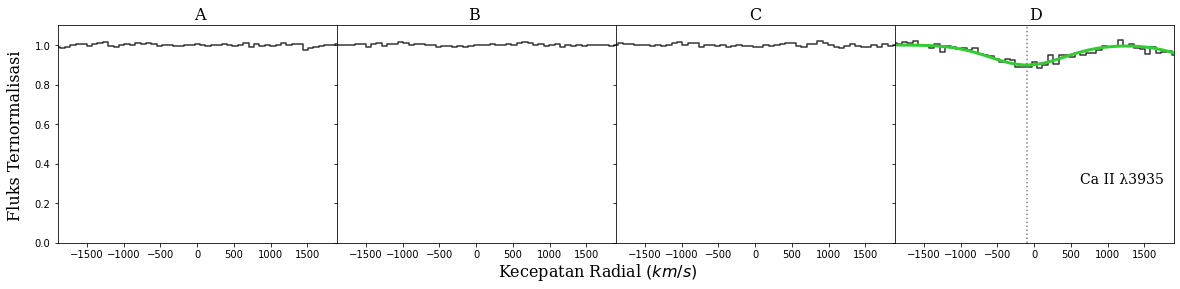

In [67]:
f, ax = plt.subplots(1, 4, figsize=(20,4), sharey='row', sharex=True, gridspec_kw={'hspace': 0, 'wspace':0})
plt.rcParams['font.family'] = 'serif'

# A
ax[0].plot(v_3935_A, fluxes_A+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0].set_ylim(0, 1.1)
ax[0].set_xlim(-1900,1900)

# B
ax[1].plot(v_3935_B, fluxes_B+1, 'k', alpha=0.8, drawstyle='steps-mid')
#ax[1].set_ylim(0.5, 1.1)
ax[1].set_xlim(-1900,1900)

# C
ax[2].plot(v_3935_C, fluxes_C+1, 'k', alpha=0.8, drawstyle='steps-mid')
#ax[2].set_ylim(0.5, 1.1)
ax[2].set_xlim(-1900,1900)

# D
ax[3].plot(v_3935_D, fluxes_D+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[3].plot(v_3935_D, true_spectrum_D(wavelengths_D)+1, lw=3, color='limegreen')
ax[3].axvline(vline_3935_D, color="grey", linestyle=":")
#ax[3].set_ylim(0.5, 1.1)
ax[3].set_xlim(-1900,1900)

f.text(0.22, 0.9, 'A', fontsize=16)
f.text(0.41, 0.9, 'B', fontsize=16)
f.text(0.605, 0.9, 'C', fontsize=16)
f.text(0.8, 0.9, 'D', fontsize=16)

f.text(0.835, 0.33, 'Ca II λ3935', fontsize=14)

f.text(0.5, 0.01, 'Kecepatan Radial $(km/s)$', fontsize=16, ha='center')
f.text(0.09, 0.5, 'Fluks Ternormalisasi', fontsize=16, va='center', rotation='vertical')

plt.show()

Text(0, 0.5, 'Fluks Ternormalisasi')

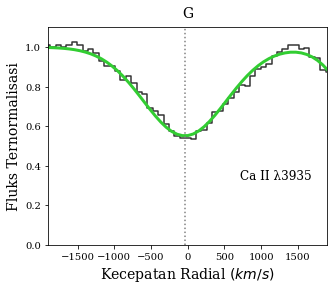

In [68]:
plt.figure(figsize=(5,4))
plt.rcParams['font.family'] = 'serif'

# G
plt.plot(v_3935_G, fluxes_G+1, 'k', alpha=0.8, drawstyle='steps-mid')
plt.plot(v_3935_G, true_spectrum_G(wavelengths_G)+1, lw=3, color='limegreen')
plt.axvline(vline_3935_G, color="grey", linestyle=":")
plt.ylim(0.0, 1.1)
plt.xlim(-1900,1900)

plt.text(0.5, 1.15, 'G', fontsize=14, ha='center')
plt.text(1200, 0.33, 'Ca II λ3935', fontsize=12, ha='center')

plt.xlabel('Kecepatan Radial $(km/s)$', fontsize=14)
plt.ylabel('Fluks Ternormalisasi', fontsize=14)

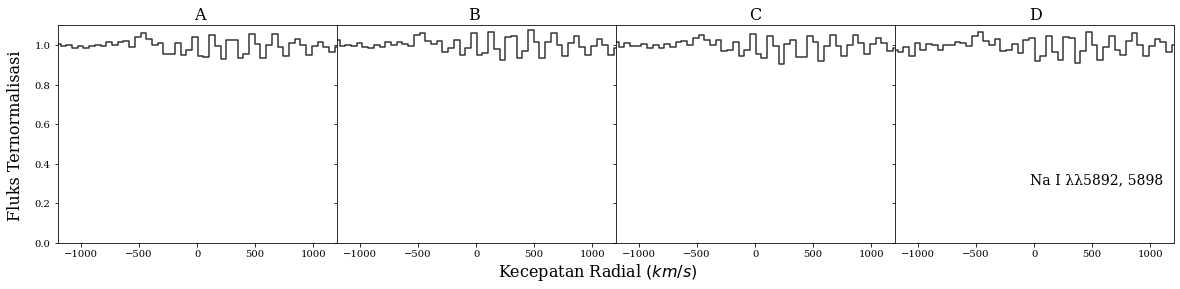

In [69]:
f, ax = plt.subplots(1, 4, figsize=(20,4), sharey='row', sharex=True, gridspec_kw={'hspace': 0, 'wspace':0})
plt.rcParams['font.family'] = 'serif'

ax[0].plot(v_5892_A, fluxes_A2+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0].set_ylim(0, 1.1)
ax[0].set_xlim(-1200,1200)

ax[1].plot(v_5892_B, fluxes_B2+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1].set_xlim(-1200,1200)

ax[2].plot(v_5892_C, fluxes_C2+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[2].set_xlim(-1200,1200)

ax[3].plot(v_5892_D, fluxes_D2+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[3].set_xlim(-1200,1200)

f.text(0.22, 0.9, 'A', fontsize=16)
f.text(0.41, 0.9, 'B', fontsize=16)
f.text(0.605, 0.9, 'C', fontsize=16)
f.text(0.8, 0.9, 'D', fontsize=16)

f.text(0.8, 0.33, 'Na I λλ5892, 5898', fontsize=14)

f.text(0.5, 0.01, 'Kecepatan Radial $(km/s)$', fontsize=16, ha='center')
f.text(0.09, 0.5, 'Fluks Ternormalisasi', fontsize=16, va='center', rotation='vertical')

plt.show()

Text(0, 0.5, 'Fluks Ternormalisasi')

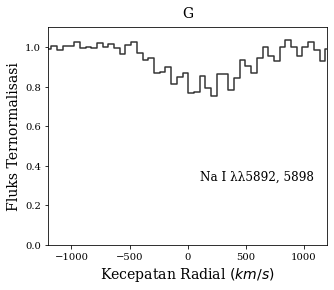

In [70]:
plt.figure(figsize=(5,4))
plt.rcParams['font.family'] = 'serif'

# G
plt.plot(v_5892_G, fluxes_G2+1, 'k', alpha=0.8, drawstyle='steps-mid')
plt.ylim(0.0, 1.1)
plt.xlim(-1200,1200)

plt.text(0, 1.15, 'G', fontsize=14, ha='center')
plt.text(600, 0.33, 'Na I λλ5892, 5898', ha='center', fontsize=12)

plt.xlabel('Kecepatan Radial $(km/s)$', fontsize=14)
plt.ylabel('Fluks Ternormalisasi', fontsize=14)